# Laboratorium 1


### Konfiguracja

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random
import math
from enum import Enum, auto

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [2]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


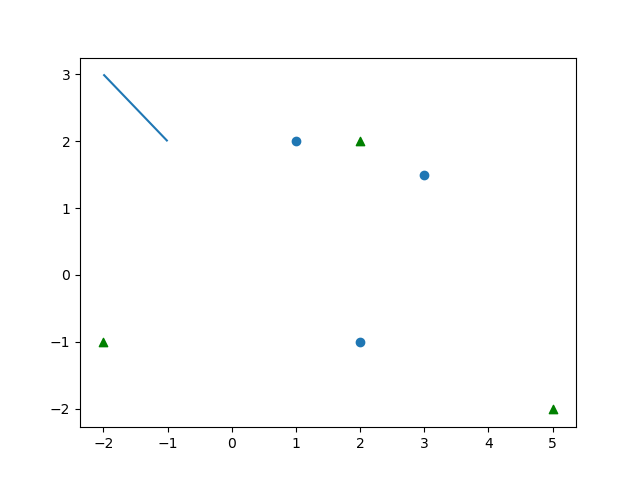

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

In [3]:
%matplotlib notebook



In [16]:
def generate_points_within_range(count, min, max):
    points = [(0.0, 0.0)] * count
    for i in range(count):
        sign_x, sign_y = 1, 1
        if random.random() < .5 :
            sign_x = -1
        
        if random.random() < .5:
            sign_y = -1
        
        x = random.random() * max * sign_x
        y = random.random() * max * sign_y
        
        points[i] = (x, y)
        
    return points

def generate_points_a():
    return generate_points_within_range(10 ** 5, -10000, 10000)

def generate_points_b():
    return generate_points_within_range(10 ** 5, - (10 ** 14), 10 **14)

In [38]:
def generate_points_c():
    radius = 100.0
    count = 1000
    
    points = [(0.0, 0.0)] * count
    
    for i in range(count):
        t = random.random()
        
        x = math.cos(2 * math.pi / t)
        y = math.sin(2 * math.pi / t)
        
        points[i] = (x * radius, y * radius)
    
    return points
    

In [34]:
def generate_points_d():
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    count = 1000
    
    points = [(0.0, 0.0)] * count
    
    vector = (b[0] - a[0], b[1] - a[1])
    vector_len = math.sqrt(vector[0] ** 2 + vector[1] ** 2)
    
    normalized_vector = (vector[0] / vector_len, vector[1] / vector_len)
    
    for i in range(count):
        scale = random.random() * 1000 * random.choice([-1, 1])
        points[i] = (normalized_vector[0] * scale, normalized_vector[1] * scale)
    
    return points    
    

<IPython.core.display.Javascript object>


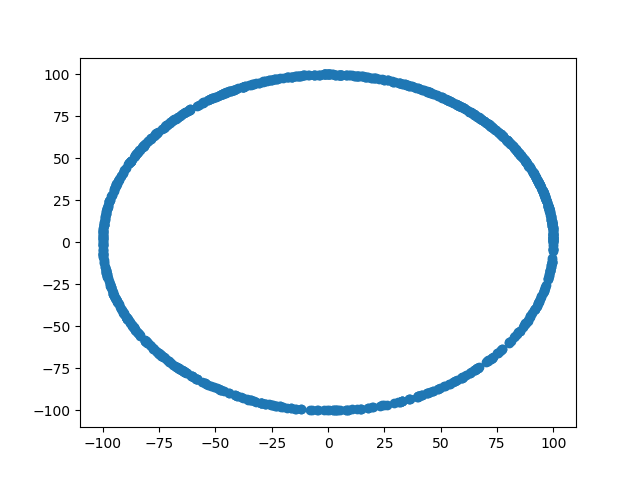

In [39]:
%matplotlib notebook

points_a = generate_points_c()

plot = Plot([PointsCollection(points_a)])
plot.draw()

In [46]:
def det(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1])*(b[0] - c[0])

class Orientation(Enum):
    LEFT = auto()
    RIGHT = auto()
    COLINEAR = auto()
    

In [49]:
def classify_point(c, epsilon):
    a = (-1.0, 0.0)
    b = (1.0, 0.1)
    
    determinant = det(a, b, c)
    orientation = Orientation.COLINEAR
    
    if determinant > epsilon:
        orientation = Orientation.LEFT
    elif determinantn < -epsilon:
        orientation = Orientation.RIGHT
    
    return orientation

In [50]:
def classify(points, epsilon):
    
    orientation_left, orientation_right, orientation_colinear = 0, 0, 0
    
    for point in points:
        orientation = classify_point(point)
        
        if orientation == Orientation.LEFT:
            orinetation_left = orientation_left + 1
        elif orientation == Orientation.RIGHT:
            orientation_right = orientation_right +1
        else:
            orientation_colinear = orientation_colinear + 1